# Ag Analytics-PRISM GDD- Demo


Source data obtained from PRISM Climate Group, Oregon State University. Produces accumulation to date and historical growing degree days, the cumulative sum of days above 50°F.


In [ ]:
import requests
import json
import time
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import dates
from matplotlib.dates import DateFormatter
%autosave 0

### API details

####Request URL:
https://ag-analytics.azure-api.net/prismgdd/[?month][&day][&year][&coordinateX][&coordinateY][&startYear]

####Parameters:

***month***
***day***
***year - ***
Define the end year of data range.

***coordinateX - ***
X coordinate for location desired.

***coordinateY - ***
Y coordinate for location desired.

***startYear - ***
Define the start year of data range.


In order to get Ocp-Apim-Subscription-Key, please click on this link https://analytics.ag/Session/SignInToAPIPayment

### Request Parameters

In [ ]:
month=1
day=1
year=2019
coordinateX=-88.9893385940128
coordinateY=40.010959177421654
startYear=1981

headers={'Ocp-Apim-Subscription-Key': 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'}
           

###  API Function

In [8]:
def get_prism_gdd(month,day,year,coordinateX,coordinateY,startYear,headers):
    try:
        url = "https://ag-analytics.azure-api.net/prismgdd/?month={}&day={}&year={}&coordinateX={}&coordinateY={}&startYear={}".format(month,day,year,coordinateX,coordinateY,startYear)
     
        response = (requests.get(url,headers=headers).text)
        
        response_json = json.loads(response)
        print(response_json)
        time.sleep(0.5)
        return response_json
    
    except Exception as e:
        raise e

### Calling API Function and print output

In [9]:
gdd=get_prism_gdd(month,day,year,coordinateX,coordinateY,startYear,headers)

[{'CumGDD': [{'Date': '1-1', 'Accumulated GDD': 0.0}, {'Date': '1-10', 'Accumulated GDD': 0.0}, {'Date': '1-11', 'Accumulated GDD': 0.0}, {'Date': '1-12', 'Accumulated GDD': 0.0}, {'Date': '1-13', 'Accumulated GDD': 0.0}, {'Date': '1-14', 'Accumulated GDD': 0.0}, {'Date': '1-15', 'Accumulated GDD': 0.0}, {'Date': '1-16', 'Accumulated GDD': 0.0}, {'Date': '1-17', 'Accumulated GDD': 0.0}, {'Date': '1-18', 'Accumulated GDD': 0.0}, {'Date': '1-19', 'Accumulated GDD': 0.0}, {'Date': '1-2', 'Accumulated GDD': 0.0}, {'Date': '1-20', 'Accumulated GDD': 0.0}, {'Date': '1-21', 'Accumulated GDD': 0.0}, {'Date': '1-22', 'Accumulated GDD': 0.0}, {'Date': '1-23', 'Accumulated GDD': 0.0}, {'Date': '1-24', 'Accumulated GDD': 0.0}, {'Date': '1-25', 'Accumulated GDD': 0.0}, {'Date': '1-26', 'Accumulated GDD': 0.0}, {'Date': '1-27', 'Accumulated GDD': 0.0}, {'Date': '1-28', 'Accumulated GDD': 0.0}, {'Date': '1-29', 'Accumulated GDD': 0.0}, {'Date': '1-3', 'Accumulated GDD': 0.0}, {'Date': '1-30', 'Accumu

### Displaying output

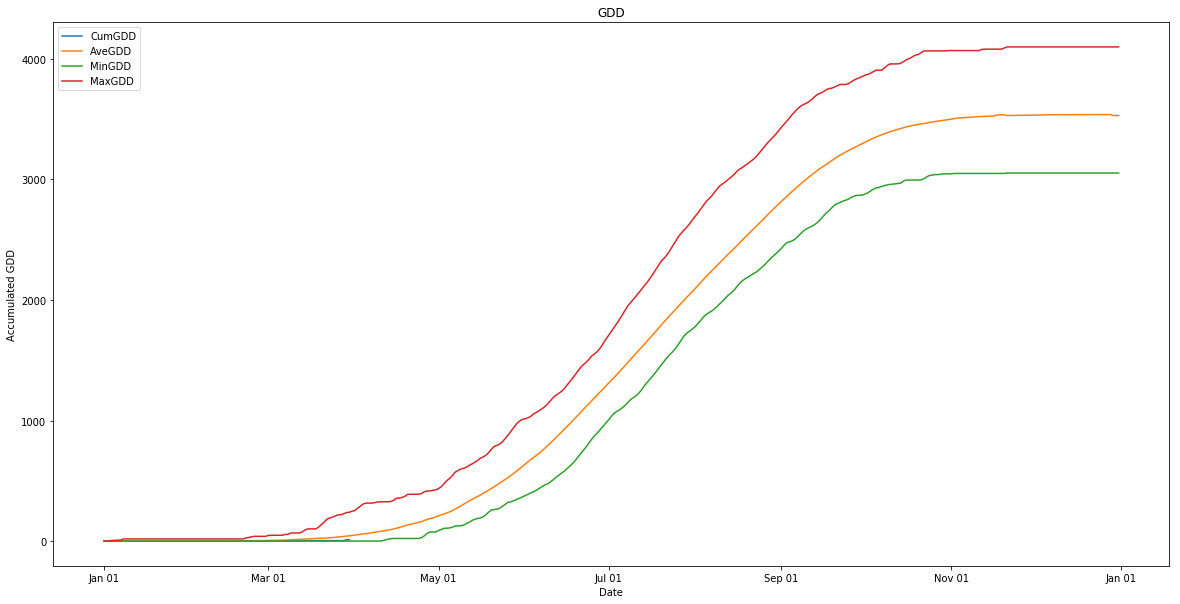

In [11]:
res=pd.DataFrame()

for i,j in enumerate(gdd):
    
    for index in gdd[i].keys():
            
        
        df = pd.DataFrame.from_records(j[index])
        df.rename(columns={'Accumulated GDD':index},inplace=True)
        
        if res.empty:
            res=df
        else:
            res=res.merge(df,on="Date",how="outer")

# removing feb 29th as the pandas datetime cannot handle just the feb 29th without year

res = res[~(res['Date']=="2-29")]
res['Date']=pd.to_datetime(res['Date'], format = '%m-%d')
dfmt = dates.DateFormatter('%b %d')
res.set_index('Date',inplace=True)

res=res.sort_index()

fig, ax = plt.subplots(figsize=(20,10), linewidth=5)

ax.plot(res)
ax.set_xlabel("Date")
ax.set_ylabel("Accumulated GDD")
ax.set_title("GDD")
ax.legend(res.columns)
ax.xaxis.set_major_formatter(dfmt)
